# Machine learning

## Practice Task 2. Exploratory Data Analysis and Linear Regression

### General information
Date of issue: 

Soft deadline: 

Hard Deadline: 

### About the job
In this task, we will try to learn how to analyze data and select useful features from them. We'll also learn how to use ``seaborn`` and ``sklearn``, while also getting used to the basic concepts of machine learning.

### Evaluation and Penalties
Each of the tasks has a certain "cost" (indicated in parentheses near the task). The maximum allowable grade for a job is 10 points. The reviewer has the right to lower the grade for ineffective implementation or sloppy schedules.

**Please note** that each section of the homework has grading problems and questions. Questions complement the objectives and aim to interpret or justify what is happening. The code without interpretation does not make sense, therefore it is obligatory to answer the questions - for the absence of answers, we will reduce the points for the tasks. If you answer the questions, but do not write the correct code for the corresponding graded problems, then no points will be awarded for that.

You cannot hand over the task after the specified deadline. If an incomplete point is given for a task due to errors, at the discretion of the examiner, it is possible to correct the work on the conditions specified in the response letter.

The task is carried out independently. "Similar" solutions are considered plagiarism and all involved students (including those who were cheated) cannot receive more than 0 points for it (for more information on plagiarism, see the course page). If you have found a solution to some of the tasks (or part of it) in an open source, you must provide a link to this source in a separate block at the end of your work (most likely you will not be the only one who found this, therefore, in order to exclude suspicion of plagiarism, a link to the source is required).

### Change format
Tasks are submitted through the EDUFPMI-portal in the assignments section.  You must send a notebook with a completed assignment. Name the notebook itself in the format homework-practice-02-linregr-Username.ipynb, where Username is your last name.

For the convenience of checking, independently calculate your maximum score (based on the set of solved problems) and indicate below.

Rating: xx. 


This notebook uses the ``folium`` library to render maps. She works for google colab! 

In [ ]:
!pip install folium

In [1]:
import folium

m = folium.Map(location=(53.9000000, 27.5666700), zoom_start=12)

m

If you did everything correctly, then a map of Minsk should open above. .

*Find the coordinates of the place of your study and show on the map*

In [2]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
m = folium.Map(location=(53.865000000, 27.5666700), zoom_start=16)

m

**Note**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ - the place for your code and/or your answers (this smile is from http://lenny.club/magic/)

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Part 0. Preparation (1 point) 

**Task 1 (1 point)**. We will be working with data from the competition [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), in which it was necessary to predict the duration of a taxi trip. Download the training sample from this competition and upload it:

In [328]:
%%time
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

CPU times: user 2.17 s, sys: 360 ms, total: 2.53 s
Wall time: 2.68 s


In [329]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [330]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [331]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [332]:
test_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

Notice the ``pickup_datetime`` and ``dropoff_datetime columns``. The columm ``dropoff_datetime`` was added by the organizers only to the training set, that is, this column cannot be used, let's remove it. The ``pickup_datetime`` contains the date and time of the start of the trip. To make it convenient to work with it, let's convert dates to ``datetime`` objects. 


In [333]:
train_data.drop('dropoff_datetime',
  axis='columns', inplace=True)

In [334]:
train_data['pickup_datetime'] =  pd.to_datetime(train_data['pickup_datetime'])
test_data['pickup_datetime'] =  pd.to_datetime(test_data['pickup_datetime'])

In [335]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
type(train_data.pickup_datetime[1])

pandas._libs.tslibs.timestamps.Timestamp

The ``trip_duration`` column contains the target value that we want to predict. Let's take a look at the distribution of the target in the training set. To do this, draw its histogram: 

/Users/wangzuxian/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='trip_duration'>

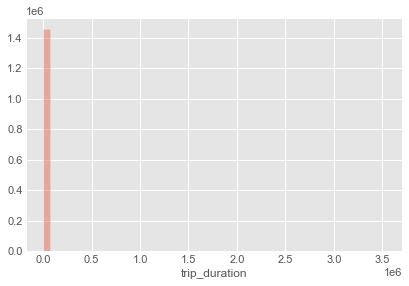

In [336]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.distplot(train_data['trip_duration'], kde=False)

**Question**: *What can be said about the target variable from the histogram of its values*?

In [337]:
train_data['trip_duration'].quantile([0.25,0.5,0.75,0.99, 1])

0.25        397.0
0.50        662.0
0.75       1075.0
0.99       3440.0
1.00    3526282.0
Name: trip_duration, dtype: float64

In [338]:
bins = [i for i in range(100,4000,100)]

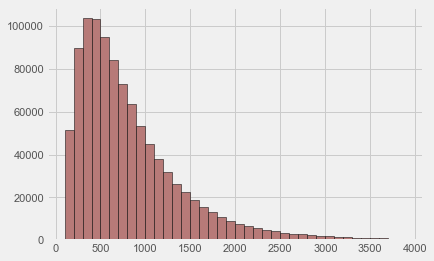

In [339]:
plt.style.use('fivethirtyeight')
plt.hist(train['trip_duration'], bins=bins, color="#B77A78",edgecolor="black",align="mid", range=(0, 4000))
plt.show()

In the competition, the quality metric was RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Question**: *Why do you think the authors of the competition chose RMSLE and not RMSE?*

There are several linear regression models in ``sklearn``, but each optimizes mean squared error (MSE) rather than RMSLE. Let's do the following trick: we will not predict the target variable, but its *logarithm*. Denote $\hat{y}_i = \log{(y_i + 1)}$ — modified target, а $\hat{a}(x_i)$ — model forecast, trained on $\hat{y}_i$, that is logarithm of target. To predict the original value, we can simply take the exponent from our prediction: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Question**: Show that RMSLE optimization for model $a$ is equivalent to MSE optimization for model  $\hat{a}$.

**Proof**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

So, we were able to reduce the RMSLE optimization problem to an MSE optimization problem that we know how to solve! In addition, the target logarithm has another useful property. To see it, add the column ``log_trip_duration`` to our sample (use ``np.log1p``) and draw a histogram of the modified target for the training sample. Delete the column with the old target. 

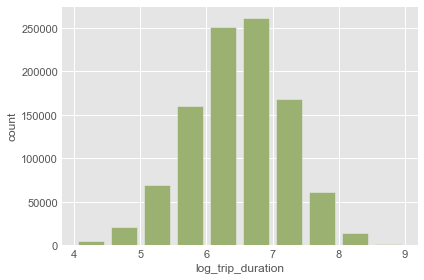

CPU times: user 168 ms, sys: 97.4 ms, total: 266 ms
Wall time: 247 ms


In [340]:
%%time
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_train=train.copy()
X_train['log_trip_duration']=np.log1p(X_train['trip_duration'])
X_train = X_train.drop(['trip_duration'], axis=1)
plt.style.use('ggplot')

plt.hist(X_train['log_trip_duration'],  histtype='bar', rwidth=0.8,color = '#9BB171',range = (4,9))
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.tight_layout()
plt.show()

To have some point of reference, let's calculate the value of the metric at the best constant prediction :

In [341]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# time distribution
print("Im secunds:", np.exp(5), np.exp(9))
print("In minutes:", np.exp(5) // 60, np.exp(9) // 60)

Im secunds: 148.4131591025766 8103.083927575384
In minutes: 2.0 135.0


In [342]:
# longest trip in hours
train_data['trip_duration'].max() // 3600 

979

## Part 1. Learn `pickup_datetime` (2 points)

**Task 2 (0.25 points)**. First, let's see how many trips there were on each of the days. Build a graph of the dependence of the number of trips on the day of the year (for example, you can use  `sns.countplot`):

In [343]:
from datetime import datetime

In [344]:
train_data['dow'] = train_data.pickup_datetime.dt.dayofweek
train_data['month'] = train_data.pickup_datetime.dt.month
train_data['hour'] = train_data.pickup_datetime.dt.hour
train_data['doy'] = train_data.pickup_datetime.dt.dayofyear

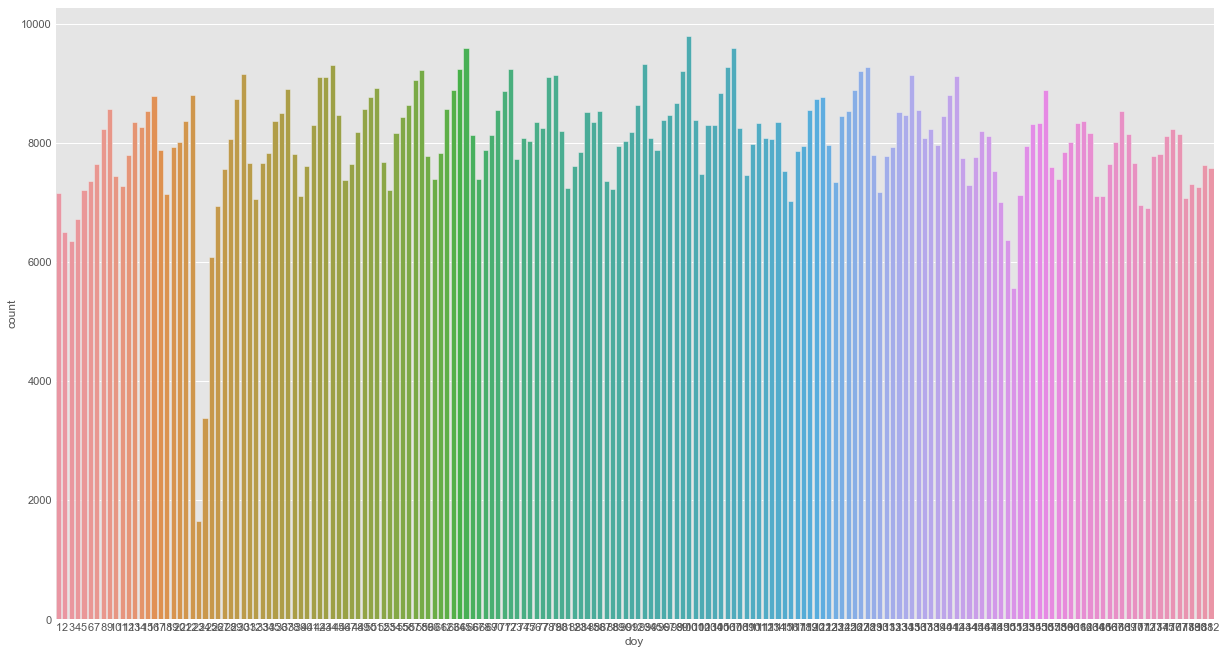

In [345]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots()
ax = sns.countplot(data=train_data, x='doy')
fig.set_size_inches(18.5, 10.5)

**Question**: You have probably noticed that there are 2 periods on the graph with abnormally small amounts of trips. Calculate on what dates these downward jumps took place and find information about what was happening in New York these days.

Draw graphs of the dependence of the number of trips on the day of the week and on the hours per day (use  `sns.relplot`):

In [346]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [347]:
grouped = train_data.groupby(by='doy').agg({'id':'count'}).reset_index()

In [348]:
import plotly.express as px

In [349]:
px.line(grouped, x='doy', y='id')

In [350]:
train_data[(train_data.doy >22) & (train_data.doy < 25)]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dow,month,hour,doy
310,id1027675,2,2016-01-23 08:46:42,1,-73.969536,40.755219,-73.976524,40.747948,N,1197,5,1,8,23
481,id3105640,1,2016-01-24 20:35:19,1,-73.977982,40.684780,-73.954132,40.613346,N,1537,6,1,20,24
593,id2657420,1,2016-01-23 00:06:25,1,-73.982101,40.745903,-73.993843,40.683250,N,1290,5,1,0,23
794,id3382236,2,2016-01-23 10:38:43,5,-73.975281,40.760990,-73.963181,40.767761,N,332,5,1,10,23
850,id2386155,2,2016-01-24 12:42:54,1,-73.983528,40.738029,-73.983238,40.737949,N,686,6,1,12,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456780,id2525361,2,2016-01-24 10:09:34,1,-73.966812,40.793770,-73.976181,40.786449,N,602,6,1,10,24
1456874,id2600978,1,2016-01-23 00:47:43,2,-73.992233,40.725750,-73.957001,40.766415,N,910,5,1,0,23
1457000,id3470639,1,2016-01-24 13:10:56,1,-73.984879,40.759155,-73.994270,40.754189,N,551,6,1,13,24
1457224,id3905294,1,2016-01-23 02:57:21,1,-73.924911,40.810028,-73.914009,40.818890,N,403,5,1,2,23


In [351]:
train_data['anomaly'] = train_data.doy.between(23, 24).apply(int)

In [352]:
sum(train_data.anomaly)

5031

**Task 3 (0.5 points)**. Draw on one graph the dependence of the number of trips on the hour in a day for different months (different curves corresponding to different months, paint in different colors, use the `hue` in` sns.relplot`). Similarly, draw the dependence of the number of trips on the hour in a day for different days of the week. 

In [353]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [354]:
grouped = train_data.groupby(by='dow').agg({'id':'count'}).reset_index()

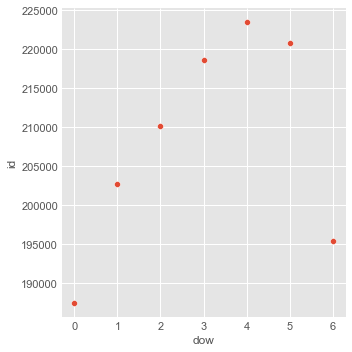

In [355]:
sns.relplot(data=grouped, x='dow', y='id')

In [356]:
px.line(grouped, x='dow', y='id')

In [357]:
grouped = train_data.groupby(by=['hour']).agg({'id':'count'}).reset_index()

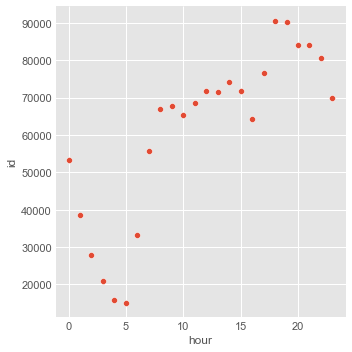

In [358]:
sns.relplot(data=grouped, x='hour', y='id')

In [359]:
px.line(grouped, x='hour', y='id')

In [360]:
grouped = train_data.groupby(by=['dow', 'hour']).agg({'id':'count'}).reset_index()

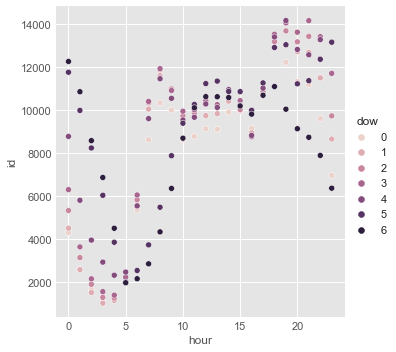

In [361]:
sns.relplot(data=grouped, x='hour', y='id', hue='dow')

In [362]:
px.line(grouped, x='hour', y='id', color='dow')

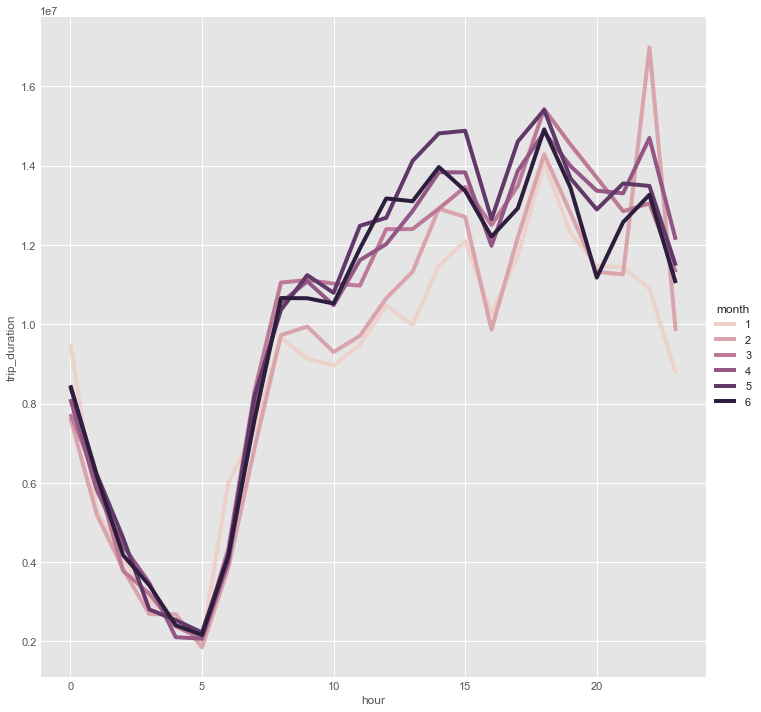

In [363]:
data1 = pd.DataFrame({'hour': train_data.hour, 'month': train_data.month, 'trip_duration': train_data['trip_duration']}).groupby([ 'hour', 'month']).sum().reset_index()
sns.relplot(data=data1, x='hour', y='trip_duration', hue="month", kind="line", height=10)

**Question**: What conclusions can be drawn based on the graphs above? Are any days of the week highlighted? Months? Times of Day? What is the reason for this?
answer:
**Task 4 (0.5 points)**. Divide the sample into training and test in a ratio of 7:3. Using the training sample, draw a graph of the average logarithm of travel time versus the day of the week. Then do the same, but for an hour in a day and a day in a year. 

In [364]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
not_use_cols = ['id', 'vendor_id', '']
use_cols = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
           'store_and_fwd_flag', 'dow', 'doy', 'hour', 'month', 'anomaly', 'trip_duration', 'log_dur']

In [367]:
train_data['log_dur'] = np.log(train_data.trip_duration + 1)

In [368]:
train_data1 = train_data.copy()

In [43]:
train, test = train_test_split(train_data[use_cols], test_size=0.3)

In [44]:
grouped = train.groupby(by='dow').agg({'log_dur':'mean'}).reset_index()
px.line(grouped, x='dow', y='log_dur')

In [45]:
grouped = train.groupby(by='hour').agg({'log_dur':'mean'}).reset_index()
px.line(grouped, x='hour', y='log_dur')

In [46]:
grouped = train.groupby(by='doy').agg({'log_dur':'mean'}).reset_index()
px.line(grouped, x='doy', y='log_dur')

**Question**: Are the graphs of the target's dependence on the day of the week and on the hour in a day similar to those for the number of trips? Why? What happens to the average target during those two anomalous periods that we saw above? Why it happens? Do you see any trend in the graph of `log_trip_duration` versus the day of the year? 

In [47]:

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Add the following tags based on `pickup_datetime`:
1. Day of the week
2. Month
3. Hour
4. Is the period anomalous (two binary signs corresponding to two anomalous periods)
5. Number of the day of the year 

In [172]:
df = pd.concat([train_data,test_data],axis = 1)

In [175]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df = pd.DataFrame()
df['dayofweek'] = train_data['pickup_datetime'].apply(lambda x: x.dayofweek)
df['month'] = train_data['pickup_datetime'].apply(lambda x: x.month)
df['hour'] = train_data['pickup_datetime'].apply(lambda x: x.hour)
df['dayofyear'] = train_data['pickup_datetime'].apply(lambda x: x.dayofyear)
df['isabnormal'] = 0

In [176]:
type(df.month[1])

numpy.int64

In [177]:
anomaly = [23, 24, 25, 150, 151]
df.loc[df['dayofyear'].isin(anomaly), 'isabnormal'] = 1

In [179]:
df

,dayofweek,month,hour,dayofyear,isabnormal
0,0,3,17,74,0
1,6,6,0,164,0
2,1,1,11,19,0
3,2,4,19,97,0
4,5,3,13,86,0
...,...,...,...,...,...
1458639,4,4,13,99,0
1458640,6,1,7,10,0
1458641,4,4,6,113,0
1458642,1,1,15,5,0


So, we have already created a number of features.

**Question**: Which of the signs should be considered as categorical, and which - as numerical? Why? 

__answers__：There is less traffic in the early hours of the morning and less traffic on weekends when you are not at work.

**Task 5 (0.75 points)**. Train `Ridge` regression with default parameters by encoding all categorical features with `OneHotEncoder`. Scale numerical features using the `StandardScaler`. Use only the signs that we have highlighted in this part of the assignment. 

In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
d = pd.get_dummies(df['dayofweek'], prefix='day')
m = pd.get_dummies(df['month'], prefix='month')
h = pd.get_dummies(df['hour'], prefix='h')
ab = pd.get_dummies(df['isabnormal'], prefix='abnorm')

df = pd.concat([d, df, m, h, ab], axis=1)
df.drop(columns=['dayofweek','month', 'hour', 'isabnormal'], inplace=True)


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['dayofyear']]),columns=['dayofyear'])
df = pd.concat([df, df_scaled], axis=1)
df.drop(columns=['dayofyear'], inplace=True)

In [182]:
df

,day_0,day_1,day_2,day_3,day_4,day_5,day_6,month_1,month_2,month_3,...,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,abnorm_0,abnorm_1
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458640,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1458641,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458642,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error 



In [183]:
y = train_data.log_dur

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.112174816846038

## Part 2. Studying the coordinates (3 points) 
We have already studied the data about the start time of the trip very well, let's now look at the information about the coordinates of the start and end of the trip. We have prepared for you a function that draws the start or end points of the trip on the map. You will find examples of its invocation below. Please note that we are passing only a small piece of data to this function, because otherwise the function will work for a very long time. 

In [184]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [185]:
show_circles_on_map(train_data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [186]:
show_circles_on_map(test_data.sample(1000), "dropoff_latitude", "dropoff_longitude", "red")

**Question**: What two points are highlighted on the map? 

**Task 6 (0.75 points)**. As we all remember perfectly , $t = s / v_{\text{ср}}$ (the time is the distance divide by the speed),therefore, it is obvious that the strongest indication will be the distance to be traveled. We cannot calculate the exact distance that a taxi needs to travel, but we can estimate it by calculating the shortest distance between the points of the beginning and the end of the trip. To correctly calculate the distance between two points on Earth, you can use the `haversine` function. You can also use the code from the first workshop. Calculate the shortest distance for objects and write it down in the `haversine` column: 

In [61]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!pip install haversine

In [62]:
from haversine import haversine



In [187]:
df

,day_0,day_1,day_2,day_3,day_4,day_5,day_6,month_1,month_2,month_3,...,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,abnorm_0,abnorm_1
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458640,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1458641,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458642,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [188]:
%%time
train_data['haversine'] = train_data.apply(lambda x: haversine((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])), axis=1)

CPU times: user 14.1 s, sys: 851 ms, total: 15 s
Wall time: 15.8 s


Since we are predicting the logarithm of travel time and want our features to be linear with this target variable, we need to log the distance : $\log t = \log s - \log{v_{\text{ср}}}$. Write the logarithm of `haversine` in a separate column:

In [189]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_data['log_haversine'] =  train_data['haversine'].apply(lambda x: np.log(x + 1e-18))

Let's make sure that the logarithm of the distance correlates better with our target than just the distance: 

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Corr haversine: %f , corr log_haversine: %f" % (y.corr(train_data['haversine']), np.log(y).corr(train_data['log_haversine'])))

Corr haversine: 0.573595 , corr log_haversine: 0.382841


**Task 7 (0.75 points)**. Let's examine the average taxi speed. Calculate the average speed for each object in the training set by dividing `haversine` by `trip_duration` and plot its distribution 

(array([1.458631e+06, 3.000000e+00, 2.000000e+00, 4.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0.        ,  18.58812538,  37.17625076,  55.76437614,
         74.35250152,  92.94062691, 111.52875229, 130.11687767,
        148.70500305, 167.29312843, 185.88125381]),
 <BarContainer object of 10 artists>)

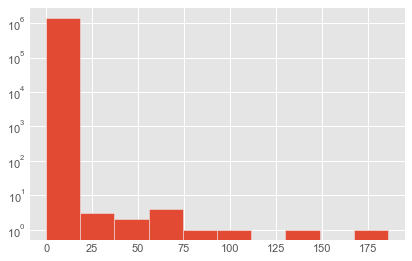

In [190]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(np.array(train_data['haversine']) / np.array(y), log=True)

As you can see from the histogram, for some objects we got a lot higher values of velocities. Draw a histogram for the objects for which the speed value turned out to be reasonable (for example, you can omit the consideration of objects where the speed is greater than a certain quantile): 

(array([174803., 483207., 301205., 159297.,  93278.,  59587.,  38367.,
         29256.,  28733.,  17978.]),
 array([0.        , 0.14884362, 0.29768725, 0.44653087, 0.5953745 ,
        0.74421812, 0.89306174, 1.04190537, 1.19074899, 1.33959262,
        1.48843624]),
 <BarContainer object of 10 artists>)

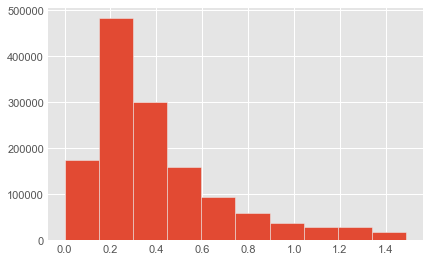

In [191]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
speed = np.array(train_data['haversine']) / np.array(y)
border = np.percentile(speed, 95)
normal_speed = speed[speed < border] 

plt.hist(normal_speed)

For each pair (day of the week, hour of the day), calculate the median of the speeds. Draw a graph using `sns.heatmap`, where the axes will be the days of the week and the hours, and the value of the function will be the median of the speed 

In [192]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def heatmap(X_):
    dw = pd.concat([X_['dayofweek'], X_['hour']], axis=1)
    dw['speed'] = pd.Series(speed)
    
    df = dw.pivot_table(index='dayofweek', columns='hour', values='speed', aggfunc=np.median)
    sns.heatmap(df, annot=False, fmt=".1f")

    plt.show()

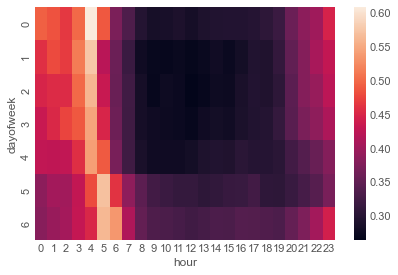

In [193]:
train_data['dayofweek'] = train_data['pickup_datetime'].apply(lambda x: x.dayofweek)
train_data['hour'] = train_data['pickup_datetime'].apply(lambda x: x.hour)

heatmap(train_data)

Don't forget to remove the speed column from the data!

**Question**: Why can't the speed value be used during training? 

In [194]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Question**: Look carefully at the graph and tell me at what points in time the speed is minimal; maximum.

Create the signs "the trip is made during the traffic jams" and "the trip is made during the free roads" (of course, they should not depend on the speed!): 

In [195]:
dw = pd.concat([train_data['dayofweek'], train_data['hour']], axis=1)
dw['speed'] = pd.Series(speed)
df = dw.pivot_table(index='dayofweek', columns='hour', values='speed', aggfunc=np.median)

In [196]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
trafficgam = df <= 0.4

train_data['is_traficgam'] = train_data.apply(lambda x: 1 if trafficgam[ [int(x['hour'])][0]][int(x['dayofweek'])] else 0, axis=1)
train_data['is_not_traficgam'] = train_data['is_traficgam'].apply(lambda x: (x + 1) % 2)


**Task 8 (0.25 points)**. As noted above, two points are highlighted on the map far from Manhattan. For each of them, add two features to the sample: whether the trip began in it and whether it ended in it. 

In [197]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_data['start'] = train_data['pickup_longitude'].apply(lambda x: 1 if x < -120  else 0)
train_data['end'] = train_data['dropoff_longitude'].apply(lambda x: 1 if x < -120  else 0)

For each of the created features, draw a "box with a mustache" (`sns.boxplot`) of the distribution of the logarithm of the trip time 

<AxesSubplot:xlabel='is_traficgam', ylabel='log_dur'>

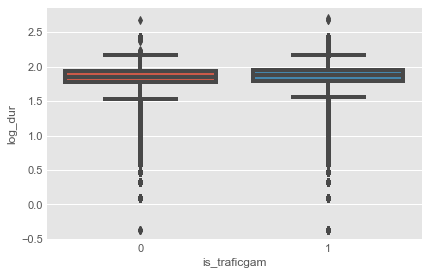

In [198]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
col = ['is_traficgam', 'is_not_traficgam', 'start', 'end']

sns.boxplot(x=train_data[col[0]], y=np.log(y))

<AxesSubplot:xlabel='is_not_traficgam', ylabel='log_dur'>

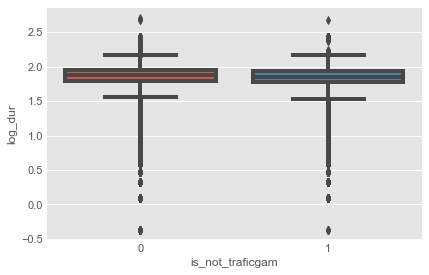

In [199]:
sns.boxplot(x=train_data[col[1]], y=np.log(y))

**Question**: How do you think (looking at the charts) these features turned out good? 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Task 9 (1 point)**. Now we almost never use the coordinates themselves. There are several reasons for this: separately considering latitude and longitude does not make much sense, it is worth considering them together. Secondly, it is clear that the relationship between our target and coordinates is not linear. To somehow use the coordinates, you can resort to the following trick: frame the area with the most trips with a rectangle (as in the picture). Let's break this rectangle into cells. To each point we associate the number of its cell, and to those points that did not fall into any of the cells, we associate the value -1.

Write a transformer that first breaks the area shown in the figure into cells, and then creates two features: the cell number in which the trip began and the cell number in which the trip ended. Choose the number of rows and columns yourself.

Please note that all calculations must be vectorized, the transformer must not modify the inplace sample passed to it, and all necessary statistics (if they are suddenly needed) must be read only from the training sample in the `fit` method: 

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

SyntaxError: unexpected EOF while parsing (4038650922.py, line 4)

In [94]:
!pip install ipyleaflet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 367.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 371.9 kB/s eta 0:00:00a 0:00:01


  Attempting uninstall: branca
    Found existing installation: branca 0.4.2
    Uninstalling branca-0.4.2:
      Successfully uninstalled branca-0.4.2


from open-source [here](https://ru.stackoverflow.com/questions/1161594/%D0%A0%D0%B0%D0%B7%D0%B1%D0%B8%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8-%D0%BD%D0%B0-%D1%8F%D1%87%D0%B5%D0%B9%D0%BA%D0%B8-%D0%B8-%D0%BF%D1%80%D0%B8%D1%81%D0%B2%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B5%D1%82%D0%BE%D0%BA-%D1%81-%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D0%BE%D0%BC-%D0%B8-%D0%BA%D0%BE%D0%BD%D1%86%D0%BE%D0%BC)

In [200]:
from sklearn.base import BaseEstimator, TransformerMixin
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, Polygon, CircleMarker, LayerGroup

In [201]:
class MapGridTransformer(BaseEstimator, TransformerMixin):

    def __init__(self,loc, col, row):
        self.location_mh = loc
        self.col = col
        self.row = row

    def create_box_(self, loc):
        polygon_loc = [
                    [(loc[0] - self.walls[0] / 2), loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] + self.walls[1] / 2],
                    [loc[0] - self.walls[0] / 2, loc[1] + self.walls[1] / 2]
                  ]
        return polygon_loc

    def show_map(self):
        self.walls, self.circles_loc = self._fit()
        _map = Map(center=((self.location_mh[:, 0]).mean(), (self.location_mh[:, 1]).mean()),
                   zoom=11, basemap=basemaps.Esri.NatGeoWorldMap)

        circles = [(CircleMarker(location=(lat, long), fill_color='red',
                                 fill_opacity=1, radius=5, stroke=False)) for lat, long in self.circles_loc]
        polygons = [(Polygon(locations=self.create_box_(loc), fill_opacity=0)) for loc in self.circles_loc]

        circles_layer = LayerGroup(layers=circles)
        polygon_layer = LayerGroup(layers=polygons)

        _map.add_layer(circles_layer)
        _map.add_layer(polygon_layer)

        return _map

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.walls, self.circles_loc


    def _transform(self, X):
        _, self.circles_loc = self._fit()
        circles_dict = {ind:loc for ind, loc in enumerate(self.circles_loc)}
        X['start_circle'] = ((X['pickup_latitude'] > self.circles_loc[:, 0].min()) & (X['pickup_latitude'] < self.circles_loc[:, 0].max()) & \
                             (X['pickup_longitude'] > self.circles_loc[:, 1].min()) & (X['pickup_longitude'] < self.circles_loc[:, 1].max())).map({True: 0, False : -1})
        X['end_circle'] = ((X['dropoff_latitude'] > self.circles_loc[:, 0].min()) & (X['dropoff_latitude'] < self.circles_loc[:, 0].max()) & \
                     (X['dropoff_longitude'] > self.circles_loc[:, 1].min()) & (X['dropoff_longitude'] < self.circles_loc[:, 1].max())).map({True: 0, False : -1})
        for index in X.index:
            row = X.loc[index, ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude','dropoff_longitude']]
            for key, value in circles_dict.items():
                box = np.array(self.create_box_(value))
                if ((box[:, 0].min() < row[0]) & (row[0] < box[:, 0].max())) & \
                    ((box[:, 1].min() < row[1]) & (row[1] < box[:, 1].max())):
                    X.loc[index, 'start_circle'] = key
                if ((box[:, 0].min() < row[2]) & (row[2] < box[:, 0].max())) & \
                    ((box[:, 1].min() < row[3]) & (row[3] < box[:, 1].max())): 
                    X.loc[index, 'end_circle'] = key

        return X

**Task 10 (0.25 points)**. Train the `Ridge` regression with standard parameters on the features that we have identified so far. Encode categorical tags through one-hot coding, scale numeric tags. 

In [204]:
y = train_data.log_dur
X = train_data.drop(['log_dur','id','pickup_datetime'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

2.631673902760926e-07

In [98]:
mapgrid = MapGridTransformer()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

TypeError: __init__() missing 3 required positional arguments: 'loc', 'col', and 'row'

## Part 3. Examining the remaining features (1 point)

**Task 11 (0.75 points)**. We still have 3 traits that we have not examined: `vendor_id`, `passenger_count` and `store_and_fwd_flag`.

**Question**: Consider why each of these features could be potentially useful.

Count how many unique values each of these features have:

In [205]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('vendor_id')
print(pd.unique(train_data['vendor_id']))
print(len(pd.unique(train_data['vendor_id'])))

print('passenger_count')
print(pd.unique(train_data['passenger_count']))
print(len(pd.unique(train_data['passenger_count'])))

print('store_and_fwd_flag')
print(pd.unique(train_data['store_and_fwd_flag']))
print(len(pd.unique(train_data['store_and_fwd_flag'])))

vendor_id
[1 0]
2
passenger_count
[1 6 4 2 3 5 0 7 9 8]
10
store_and_fwd_flag
[0 1]
2


Build "boxes with whiskers" of distributions of the logarithm of the trip time depending on the values of each of the features 

<AxesSubplot:xlabel='vendor_id', ylabel='log_dur'>

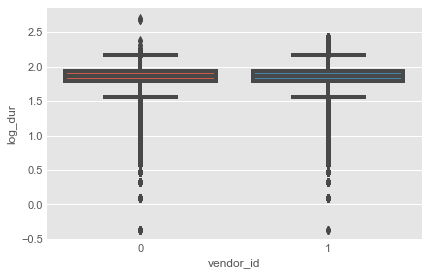

In [206]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(x=train_data['vendor_id'], y=np.log(y))


<AxesSubplot:xlabel='passenger_count', ylabel='log_dur'>

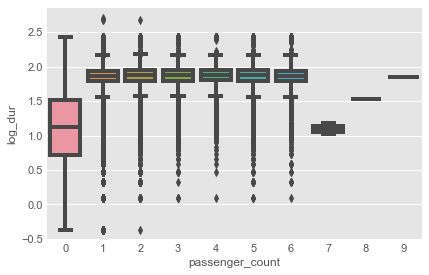

In [207]:
sns.boxplot(x=train_data['passenger_count'], y=np.log(y))


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='log_dur'>

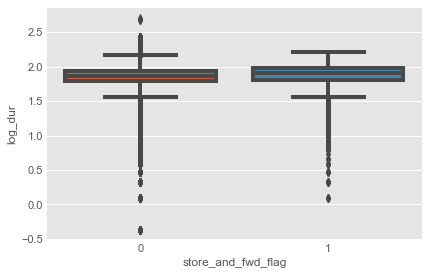

In [208]:
sns.boxplot(x=train_data['store_and_fwd_flag'], y=np.log(y))

Transform the features `vendor_id` and `store_and_fwd_flag` into values $\{0; 1\}$ 

In [209]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: x - 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

train_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,doy,anomaly,log_dur,haversine,log_haversine,dayofweek,is_traficgam,is_not_traficgam,start,end
0,id2875421,0,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,1,455,...,74,0,6.122493,1.498523,0.404480,0,1,0,0,0
1,id2377394,-1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,1,663,...,164,0,6.498282,1.805510,0.590843,6,1,0,0,0
2,id3858529,0,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,1,2124,...,19,0,7.661527,6.385107,1.853968,1,1,0,0,0
3,id3504673,0,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,1,429,...,97,0,6.063785,1.485500,0.395752,2,1,0,0,0
4,id2181028,0,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,1,435,...,86,0,6.077642,1.188590,0.172768,5,1,0,0,0


**Question**: Based on the charts above, do you think these features will be strong? 

**Task 12 (0.25 points)**. Test your assumptions by training the model on these three features as well. Train `Ridge` regression with standard parameters. Encode categorical features with one-hot coding, and scale numerical ones. 

In [210]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fl = pd.get_dummies(train_data['store_and_fwd_flag'], prefix='flag')
v_id = pd.get_dummies(train_data['vendor_id'], prefix='v_id')
count = pd.get_dummies(train_data['passenger_count'], prefix='pas_count')

feat = pd.concat([fl, v_id, count], axis=1)


In [211]:
feat

,flag_1,v_id_-1,v_id_0,pas_count_0,pas_count_1,pas_count_2,pas_count_3,pas_count_4,pas_count_5,pas_count_6,pas_count_7,pas_count_8,pas_count_9
0,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,0,1,0,0,0,0,1,0,0,0,0,0
1458640,1,1,0,0,1,0,0,0,0,0,0,0,0
1458641,1,0,1,0,1,0,0,0,0,0,0,0,0
1458642,1,1,0,0,1,0,0,0,0,0,0,0,0


In [212]:
train_data.drop(['store_and_fwd_flag','vendor_id','passenger_count'],axis = 1)

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,dow,month,...,doy,anomaly,log_dur,haversine,log_haversine,dayofweek,is_traficgam,is_not_traficgam,start,end
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,455,6.122493,0,3,...,74,0,6.122493,1.498523,0.404480,0,1,0,0,0
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,663,6.498282,6,6,...,164,0,6.498282,1.805510,0.590843,6,1,0,0,0
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,2124,7.661527,1,1,...,19,0,7.661527,6.385107,1.853968,1,1,0,0,0
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,429,6.063785,2,4,...,97,0,6.063785,1.485500,0.395752,2,1,0,0,0
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,435,6.077642,5,3,...,86,0,6.077642,1.188590,0.172768,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,778,6.658011,4,4,...,99,0,6.658011,1.225082,0.203008,4,1,0,0,0
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,655,6.486161,6,1,...,10,0,6.486161,6.049844,1.800032,6,0,1,0,0
1458641,id2304944,2016-04-22 06:57:41,-73.959129,40.768799,-74.004433,40.707371,764,6.639876,4,4,...,113,0,6.639876,7.824617,2.057275,4,1,0,0,0
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,373,5.924256,1,1,...,5,0,5.924256,1.092565,0.088529,1,1,0,0,0


In [114]:
all_feature = []
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [115]:
for i in train_data.columns:
    all_feature.append(i)

In [213]:
feat = pd.concat([feat, train_data],axis=1)
feat = feat.drop(['id','pickup_datetime'],axis = 1)

In [214]:
feat.columns

Index(['flag_1', 'v_id_-1', 'v_id_0', 'pas_count_0', 'pas_count_1',
       'pas_count_2', 'pas_count_3', 'pas_count_4', 'pas_count_5',
       'pas_count_6', 'pas_count_7', 'pas_count_8', 'pas_count_9', 'vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'dow', 'month', 'hour', 'doy',
       'anomaly', 'log_dur', 'haversine', 'log_haversine', 'dayofweek',
       'is_traficgam', 'is_not_traficgam', 'start', 'end'],
      dtype='object')

In [215]:
y = feat.log_dur

In [216]:
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.3, random_state=42)
ridge_model3 = Ridge()
ridge_model3.fit(X_train, y_train)
y_predict = np.array(np.abs(ridge_model3.predict(X_test)))
print('RMSLE = ', np.sqrt(mean_squared_log_error(y_test, y_predict)))

RMSLE =  1.315382575312356e-07


In [223]:
train_data = train_data.drop(['id','pickup_datetime'],axis = 1)

In [228]:
train_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,dow,...,doy,anomaly,log_dur,haversine,log_haversine,dayofweek,is_traficgam,is_not_traficgam,start,end
0,0,1,-73.982155,40.767937,-73.964630,40.765602,1,455,6.122493,0,...,74,0,6.122493,1.498523,0.404480,0,1,0,0,0
1,-1,1,-73.980415,40.738564,-73.999481,40.731152,1,663,6.498282,6,...,164,0,6.498282,1.805510,0.590843,6,1,0,0,0
2,0,1,-73.979027,40.763939,-74.005333,40.710087,1,2124,7.661527,1,...,19,0,7.661527,6.385107,1.853968,1,1,0,0,0
3,0,1,-74.010040,40.719971,-74.012268,40.706718,1,429,6.063785,2,...,97,0,6.063785,1.485500,0.395752,2,1,0,0,0
4,0,1,-73.973053,40.793209,-73.972923,40.782520,1,435,6.077642,5,...,86,0,6.077642,1.188590,0.172768,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,0,4,-73.982201,40.745522,-73.994911,40.740170,1,778,6.658011,4,...,99,0,6.658011,1.225082,0.203008,4,1,0,0,0
1458640,-1,1,-74.000946,40.747379,-73.970184,40.796547,1,655,6.486161,6,...,10,0,6.486161,6.049844,1.800032,6,0,1,0,0
1458641,0,1,-73.959129,40.768799,-74.004433,40.707371,1,764,6.639876,4,...,113,0,6.639876,7.824617,2.057275,4,1,0,0,0
1458642,-1,1,-73.982079,40.749062,-73.974632,40.757107,1,373,5.924256,1,...,5,0,5.924256,1.092565,0.088529,1,1,0,0,0


In [229]:
feat = pd.concat([fl, train_data], axis=1)
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.3, random_state=42)
ridge_model3 = Ridge()
ridge_model3.fit(X_train, y_train)
y_predict = np.array(np.abs(ridge_model3.predict(X_test)))
print('RMSLE = ', np.sqrt(mean_squared_log_error(y_test, y_predict)))

RMSLE =  1.3157901536526932e-07


In [226]:
feat = pd.concat([v_id, train_data], axis=1)
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.3, random_state=42)
ridge_model3 = Ridge()
ridge_model3.fit(X_train, y_train)
y_predict = np.array(np.abs(ridge_model3.predict(X_test)))
print('RMSLE = ', np.sqrt(mean_squared_log_error(y_test, y_predict)))

RMSLE =  1.3157901536341125e-07


In [227]:
feat = pd.concat([count, train_data], axis=1)
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.3, random_state=42)
ridge_model3 = Ridge()
ridge_model3.fit(X_train, y_train)
y_predict = np.array(np.abs(ridge_model3.predict(X_test)))
print('RMSLE = ', np.sqrt(mean_squared_log_error(y_test, y_predict)))

RMSLE =  1.3153825753743238e-07


If the features have not yielded any measurable improvement in the metric, they can be thrown out of the data. 

## Part 4. Improve the model (3 points)

**Task 13 (1 point)**. Our data contains atypical objects: with an abnormally short travel time, with a very long distance traveled, or very large regression residuals. In this task, it is proposed to exclude such objects from the training sample. To do this, draw histograms of the distribution of the quantities mentioned above, select objects that can be called outliers, and clear the training sample from them.

Note that although these objects look like outliers, the test sample will also most likely contain objects with the same strange values of the target variable and/or features. Therefore, it is possible that cleaning the training sample will lead to a deterioration in the quality on the test. However, it is still better to remove outliers from training to make the model more intelligent and interpretable. 

## clear data

In [458]:
m = np.mean(train_data1['trip_duration'])
s = np.std(train_data1['trip_duration'])
train_data1 = train_data1[train_data1['trip_duration'] <= m + 2*s]
train_data1 = train_data1[train_data1['trip_duration'] >= m - 2*s]
train_data1 = train_data1[train_data1['pickup_longitude'] <= -73.75]
train_data1 = train_data1[train_data1['pickup_longitude'] >= -74.03]
train_data1 = train_data1[train_data1['pickup_latitude'] <= 40.85]
train_data1 = train_data1[train_data1['pickup_latitude'] >= 40.63]
train_data1 = train_data1[train_data1['dropoff_longitude'] <= -73.75]
train_data1 = train_data1[train_data1['dropoff_longitude'] >= -74.03]
train_data1 = train_data1[train_data1['dropoff_latitude'] <= 40.85]
train_data1 = train_data1[train_data1['dropoff_latitude'] >= 40.63]
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Now we have a lot of categorical features. The categorical features may contain rare categories, which is usually bad: the model is heavily retrained on such examples. Try to combine rare categories into one. Naturally, this should only be done for really rare categories. 

In [459]:
train_data1

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dow,month,hour,doy,anomaly,log_dur
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,17,74,0,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,164,0,6.498282
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,19,97,0,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,13,86,0,6.077642
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,1,22,30,0,6.095825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,13,99,0,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6,1,7,10,0,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,6,113,0,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,15,5,0,5.924256


In [460]:
y = train_data1.log_dur

In [461]:
y

0          6.122493
1          6.498282
3          6.063785
4          6.077642
5          6.095825
             ...   
1458639    6.658011
1458640    6.486161
1458641    6.639876
1458642    5.924256
1458643    5.293305
Name: log_dur, Length: 1300470, dtype: float64

In [462]:
x = train_data1.drop(['log_dur'],axis = 1)

In [463]:
x

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dow,month,hour,doy,anomaly
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,17,74,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,164,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,19,97,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,13,86,0
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,1,22,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,13,99,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6,1,7,10,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,6,113,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,15,5,0


In [464]:
x.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'dow',
       'month', 'hour', 'doy', 'anomaly'],
      dtype='object')

In [465]:
for col in x.select_dtypes(include='object').columns:
    print(col)
    print(x[col].unique())

id
['id2875421' 'id2377394' 'id3504673' ... 'id2304944' 'id2714485'
 'id1209952']
store_and_fwd_flag
['N' 'Y']


In [466]:
from sklearn.ensemble import ExtraTreesClassifier

**Task 14 (1 point)**. After OneHot coding, the number of features in our dataset increases dramatically. Count the number of features before and after the coding of categorical features. 

## before ont hot

In [467]:
len(x.columns)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

15

In [468]:
x = x.drop(['id'],axis= 1)

In [469]:
x

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dow,month,hour,doy,anomaly
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,17,74,0
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,164,0
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,19,97,0
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,13,86,0
5,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,1,22,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,13,99,0
1458640,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6,1,7,10,0
1458641,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,6,113,0
1458642,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,15,5,0


Try to train not `Ridge`- but `Lasso`-regression. Which method is better? 

In [470]:
store_and_fwd_flag_dummies = pd.get_dummies(x['store_and_fwd_flag'], prefix = 'store_and_fwd_flag')
x = pd.concat([x, store_and_fwd_flag_dummies], axis=1)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [471]:
x = x.drop(['store_and_fwd_flag','pickup_datetime'],axis =1)

## after one hot

In [472]:
len(x.columns)

14

In [473]:
y

0          6.122493
1          6.498282
3          6.063785
4          6.077642
5          6.095825
             ...   
1458639    6.658011
1458640    6.486161
1458641    6.639876
1458642    5.924256
1458643    5.293305
Name: log_dur, Length: 1300470, dtype: float64

Divide the training set into training and validation in a ratio of 8:2. Using the validation sample, select the optimal values of the regularization parameter (on a logarithmic grid) for `Ridge` and `Lasso`, measure the quality of the best obtained model on the test sample. 

In [494]:
grid = [i for i in range(1,100,1)]
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [495]:
grid=np.log1p(grid)


In [496]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [510]:
lmse_set = dict()

In [511]:
for i in grid:

    ridge = Ridge(alpha= i)
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)
    lmse_set[i] = np.sqrt(mean_squared_log_error(y_test, y_pred))
    

In [527]:
lmse_set = sorted(lmse_set.items(),  key=lambda d: d[1])

AttributeError: 'list' object has no attribute 'items'

In [528]:
lmse_set

[(4.605170185988092, 0.049662186332845956),
 (4.59511985013459, 0.049662179838094275),
 (4.584967478670572, 0.04966217327737162),
 (4.574710978503383, 0.04966216664932501),
 (4.564348191467836, 0.04966215995255777),
 (4.553876891600541, 0.04966215318563121),
 (4.543294782270004, 0.04966214634705966),
 (4.532599493153256, 0.04966213943531012),
 (4.5217885770490405, 0.04966213244880011),
 (4.51085950651685, 0.04966212538589501),
 (4.499809670330265, 0.04966211824490602),
 (4.48863636973214, 0.04966211102408788),
 (4.477336814478207, 0.049662103721635854),
 (4.465908118654584, 0.04966209633568408),
 (4.454347296253507, 0.04966208886430026),
 (4.442651256490317, 0.04966208130548672),
 (4.430816798843313, 0.04966207365717265),
 (4.418840607796598, 0.04966206591721368),
 (4.406719247264253, 0.04966205808338801),
 (4.394449154672439, 0.04966205015339149),
 (4.382026634673881, 0.049662042124834056),
 (4.3694478524670215, 0.049662033995234854),
 (4.356708826689592, 0.0496620257620198),
 (4.3438

In [529]:
ridge = Ridge(alpha= 0.6931471805599453)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.04965965591582858

In [516]:
from sklearn import linear_model

In [519]:
loss_set = dict()

In [520]:
for i in grid:

    clf = linear_model.Lasso(alpha=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    loss_set[i] = np.sqrt(mean_squared_log_error(y_test, y_pred))

In [523]:
loss_set = sorted(loss_set.items(),  key=lambda d: d[1])

In [524]:
loss_set

[(4.605170185988092, 0.05079205923021612),
 (4.59511985013459, 0.050791419470149514),
 (4.584967478670572, 0.05079077345677358),
 (4.574710978503383, 0.05079012106431425),
 (4.564348191467836, 0.05078946216313937),
 (4.553876891600541, 0.050788796619598946),
 (4.543294782270004, 0.05078812429585664),
 (4.532599493153256, 0.0507874450497126),
 (4.5217885770490405, 0.05078675873441666),
 (4.51085950651685, 0.050786065198471446),
 (4.499809670330265, 0.05078536428542465),
 (4.48863636973214, 0.05078465583364994),
 (4.477336814478207, 0.05078393967611543),
 (4.465908118654584, 0.05078321564013909),
 (4.454347296253507, 0.05078248354713017),
 (4.442651256490317, 0.050781743212315586),
 (4.430816798843313, 0.05078099444445024),
 (4.418840607796598, 0.0507802370455102),
 (4.406719247264253, 0.05077947081036739),
 (4.394449154672439, 0.05077869552644444),
 (4.382026634673881, 0.050777910973348474),
 (4.3694478524670215, 0.05077711692248173),
 (4.356708826689592, 0.05077631313662795),
 (4.34380

In [530]:
clf = linear_model.Lasso(alpha=0.6931471805599453)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.05056111745524136

For each iterated `alpha` for Lasso, count the number of zero weights in the model and plot it versus `alpha`. How much will we have to lose in quality if we want to get rid of at least half of the features using Lasso? 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Task 15 (1 point)**. It is often useful to use feature interactions, that is, build new features based on existing ones. Above, we divided the map of Manhattan into cells and came up with signs "from which cell the trip began" and "in which cell the trip ended".

Let's try to do the following: count how many times each possible pair of these signs occurs in our dataset and select the 100 most frequent pairs. Let's encode trips with these frequent pairs as a categorical feature, and assign -1 to the rest of the objects. It turns out that we have coded from where and where the taxi was supposed to go.

You can also think of some other way to make signs about the route. If these signs give a good increase in quality, then additional bonus points can be given for this.

**Question**: Why is such a feature potentially useful? Why can't the linear model independently "pull out" this information, because it has at its disposal the signs "from which cell the trip started" and "in which cell the trip ended"? 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Re-train the model (`Ridge`, if it gave a higher quality in previous experiments, and `Lasso` otherwise) on the new data and calculate the quality on the test sample: 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Task 16 (bonus, 1 point)**. Where, if not for our task, to calculate the Manhattan distance?

**Question**: *Find what the Manhattan distance is and why it is called that. How can it help us?*

Enter the coordinate system on our map so that the axes are parallel to the streets of Manhattan, and first add the Manhattan distance between departure point and destination attribute to the data, and then add the logarithm of this attribute. Calculate the correlation between your new trait and target; between ``log_haversine`` and target. In which case is the correlation greater?

Draw a map showing the selected axes. So that we can check your work, please make a screen of this map and attach a picture (if we open your notebook, the widgets will not be displayed). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Re-train the model on the new data and calculate the quality on the test sample. 

*Has it gotten better? Explain the result obtained.*

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Task 17 (bonus, 2 points)**. Implement a transformer that builds a map partition on a hexagonal lattice using the library  [H3](https://github.com/uber/h3-py) and calculates features based on such a partition.

Features can be very different: the distance between the start and finish points, counted in the number of hexagons; statistics on the number of trips and on their duration in adjacent hexagons.

Important: the performance of the library significantly depends on the number of hexagons on the map (determined by the resolution parameter). Choose a resolution so that your code will run in a reasonable amount of time.

Measure the quality after adding new features. For improving the error functionality, 0.5 bonus points will be given for every 0.005 on the test sample. You can get up to 2 bonus points for this task. 


In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Insert a picture describing your experience with this home-work.